1.3457587705776286
20000000.0 702063.3169648664
13000000.0 -944807.8663062905
525 167873.63485468994
502058.75693649595 476194.4756073035
525 920.1651506911622 545 915.9062622400189 545 304.58245003885224 417.64984504217216 280 386.2425298279675 553.15
2902.4569466216803 599.4064757319667


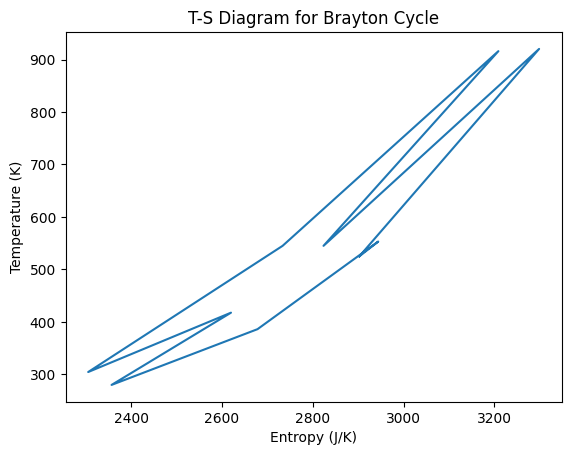

In [3]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo = '/home/zyq0416/workspace/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import math

import numpy as np
import pandas as pd
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt

M_cao = 56e-3  # kg/mol
M_caoh2 = 74e-3  # kg/mol
M_H20 = 18e-3  # kg/mol

if __name__ == '__main__':
    
    Tbre=525
    miujx=0.98
    mius=0.88
    tmin=20
    tyure=300
    ex_co2=500 #W/(m²·K)
  
    r=1
    PbreL=7.6e6     #7.6MPa
    #PbreHs=np.arange(200e5, 222e5, 2e5)
    #PbreMs=np.arange(130e5, 142e5, 2e5)
    PbreH=20e6
    PbreM=13e6

        #for PbreH in PbreHs:
            #for PbreM in PbreMs:
                #print(f"solving the case: Tbre = {Tbre}, PbreH = {PbreH}, PbreM = {PbreM}")
                #case_id=f"Tbre={Tbre}_PbreH={PbreH}_PbreM={PbreM}"
                #print(f"case_id: {case_id}")
T1=Tbre
P1=PbreL
H1=CP.PropsSI('H', 'T', T1+273.15, 'P', P1, "REFPROP::co2") 
S1=CP.PropsSI('S', 'T', T1+273.15, 'P', P1, "REFPROP::co2")
#一级压缩，等熵压缩
S2=S1/mius
P2=PbreM
T2=CP.PropsSI('T', 'S', S2, 'P', P2, "REFPROP::co2")-273.15
H2=CP.PropsSI('H', 'T', T2+273.15, 'P', P2, "REFPROP::co2")

Test=CP.PropsSI('T', 'S', S2*0.88, 'P', P2, "REFPROP::co2")-273.15

W1=(H2-H1)/miujx
#一级换热
T3=Tbre+tmin
P3=P2
H3=CP.PropsSI('H', 'T', T3+273.15, 'P', P3, "REFPROP::co2") 
S3=CP.PropsSI('S', 'T', T3+273.15, 'P', P3, "REFPROP::co2")

Hot1=H3-H2
#二级压缩
S4=S3/mius
P4=PbreH
T4=CP.PropsSI('T', 'S', S4, 'P', P4, "REFPROP::co2")-273.15
H4=CP.PropsSI('H', 'T', T4+273.15, 'P', P4, "REFPROP::co2")

W2=(H4-H3)/miujx
#二级换热
T5=Tbre+tmin
P5=P4
H5=CP.PropsSI('H', 'T', T5+273.15, 'P', P5, "REFPROP::co2") 
S5=CP.PropsSI('S', 'T', T5+273.15, 'P', P5, "REFPROP::co2")

Hot2=H5-H4
#主换热器
H10=CP.PropsSI('H', 'T', tyure+273.15-tmin, 'P', P1, "REFPROP::co2")
hotzhc=H1-H10
hotzhh=hotzhc/0.96

H6=H5-hotzhh
P6=P5
T6=CP.PropsSI('T', 'H', H6, 'P', P6, "REFPROP::co2")-273.15
S6=CP.PropsSI('S', 'T', T6+273.15, 'P', P6, "REFPROP::co2")
#if T6<=tyure+273.15-tmin+5:
    #break

#一级透平
S7=S6/mius
P7=PbreM
T7=CP.PropsSI('T', 'S', S7, 'P', P7, "REFPROP::co2")-273.15
H7=CP.PropsSI('H', 'T', T7+273.15, 'P', P7, "REFPROP::co2")

E1=(H7-H6)*miujx
#回热
T8=tyure-tmin
P8=P7
H8=CP.PropsSI('H', 'T', T8+273.15, 'P', P8, "REFPROP::co2") 
S8=CP.PropsSI('S', 'T', T8+273.15, 'P', P8, "REFPROP::co2")

hoth1=H8-H7
#二级透平
S9=S8/mius
P9=PbreL
T9=CP.PropsSI('T', 'S', S9, 'P', P9, "REFPROP::co2")-273.15
H9=CP.PropsSI('H', 'T', T9+273.15, 'P', P9, "REFPROP::co2")

E2=(H9-H8)*miujx
#主回热
T10=tyure+273.15-tmin
P10=P9
H10=CP.PropsSI('H', 'T', T10+273.15, 'P', P10, "REFPROP::co2") 
S10=CP.PropsSI('S', 'T', T10+273.15, 'P', P10, "REFPROP::co2")

hoth2=H10-H8

Ecost=W1+W2-E1-E2
Hotout=Hot1+Hot2
Hotin=hoth1+hoth2
cop=-Hotout/Ecost
A_total=(Hotin+hotzhh)/ex_co2


best_cop=cop
best_PH=PbreH
best_PM=PbreM
best_Tbre=Tbre
print(best_cop)
print(best_PH,Ecost)
print(best_PM,Hotout)
print(best_Tbre,Hotin)
print(W1,W2)
print(T1,T2,T3,T4,T5,T6,T7,T8,T9,T10)
print(S1,Test)#J/mol/K
points = [(S1, T1), (S2, T2), (S3, T3), (S4, T4), (S5, T5),
          (S6, T6), (S7, T7), (S8, T8), (S9, T9), (S10, T10)]

# 添加第一个点到最后，形成闭合图像
points.append(points[0])

# 提取S和T的值
S = [point[0] for point in points]
T = [point[1] for point in points]
plt.xlabel('Entropy (J/K)')
plt.ylabel('Temperature (K)')
plt.title('T-S Diagram for Brayton Cycle')
# 绘制图像
plt.plot(S, T)
plt.show()